In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['font.size'] = 20

In [2]:
data = pd.read_csv("observed-solar-cycle-indices.csv")
dt = data.rename(columns={'time-tag': 'date'})
dt['date'] = pd.to_datetime(dt['date'], format='%Y-%m')
dt = dt.set_index('date')
dt['year'] = dt.index.year
dt = dt[['ssn', 'year']]
dt.head()

,ssn,year
date,,
1749-01-01,96.7,1749
1749-02-01,104.3,1749
1749-03-01,116.7,1749
1749-04-01,92.8,1749
1749-05-01,141.7,1749


In [3]:
# Identify the smallest ssn values
threshold_ssn = 10
minimum_ssn = dt[(dt['ssn']<=threshold_ssn)].drop_duplicates(subset=['year'])

# Remove small values close together 
minimum_ssn['year_diff'] = minimum_ssn['year'].diff()
threshold = 5 # years
trough_points = minimum_ssn[minimum_ssn['year_diff'] >= threshold]

# Add trough years to main table
dt['troughs'] = trough_points['year']
dt['troughs'].fillna('None', inplace=True)
dt.head()

,ssn,year,troughs
date,,,
1749-01-01,96.7,1749,None
1749-02-01,104.3,1749,None
1749-03-01,116.7,1749,None
1749-04-01,92.8,1749,None
1749-05-01,141.7,1749,None


In [4]:
trough_years = dt[(dt['troughs']!='None')]['year'].index

periods = {}
for period in range(len(trough_years)):
    if period < max(range(len(trough_years))):
        cycle = dt[(dt.index >= trough_years[period]) & (dt.index <= trough_years[period+1])]
        periods[period] = cycle

peak_ssn = []
peak_years = []

for key in periods.keys():
    df = periods[key]
    maxSSN = df['ssn'].max()
    peak_ssn.append(maxSSN)

    maxYear = df[df['ssn'] == maxSSN].index[0]
    peak_years.append(maxYear)


(-80718.0, 19723.0)

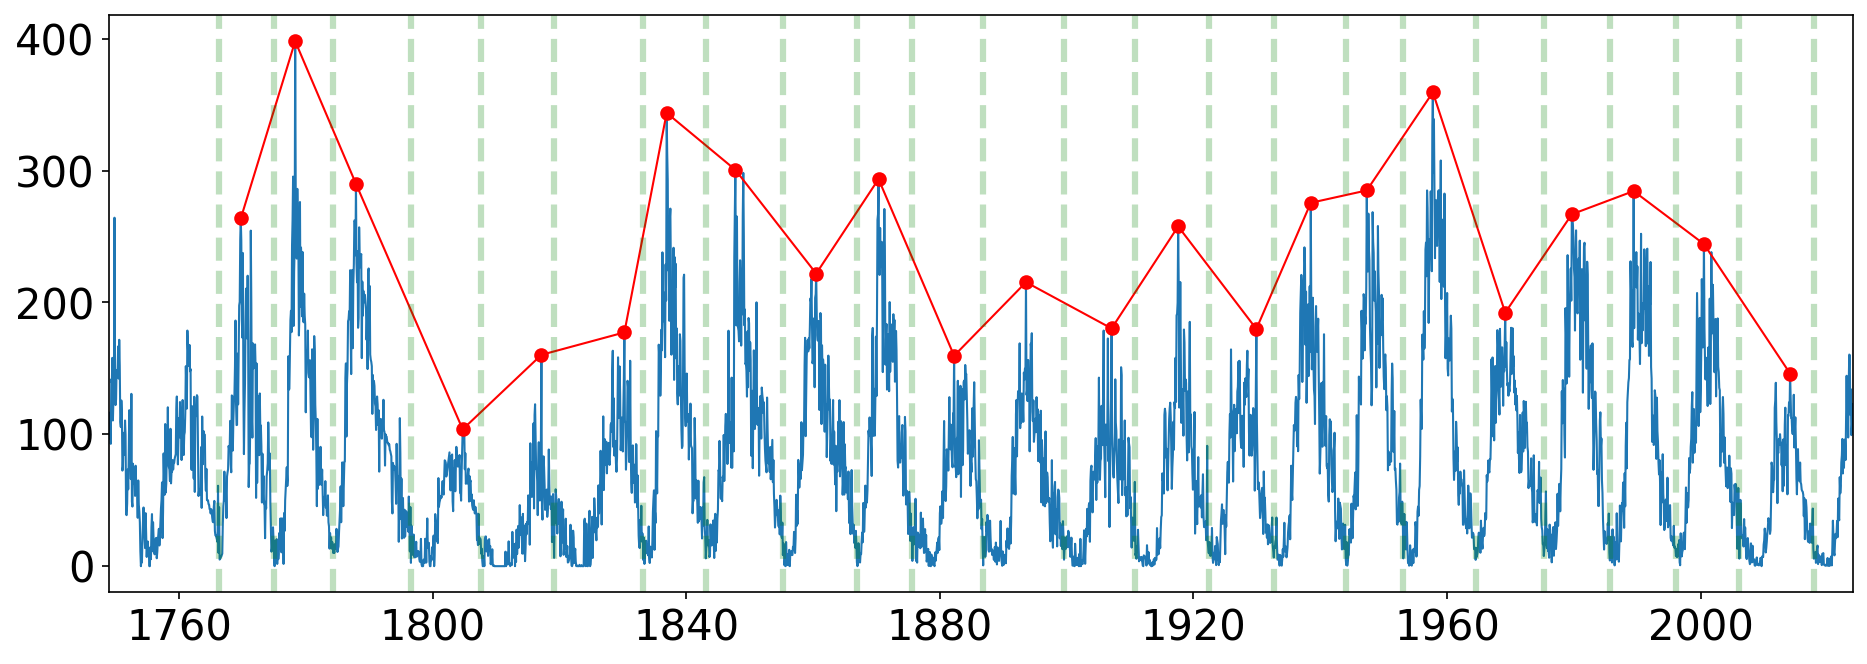

In [11]:
x_width, y_width = 15, 5
fig, ax = plt.subplots(1, 1, figsize=(x_width, y_width), dpi=150)
ax.plot(dt['ssn'], '-', linewidth=1)
ax.plot(peak_years, peak_ssn, marker='o', linewidth=1, color='red')

for trough_date in trough_points.index:
    ax.axvline(x=trough_date, color='green', linestyle='--', linewidth=3, alpha=0.25)

plt.xlim(dt['ssn'].index.min(), dt['ssn'].index.max())

([<matplotlib.axis.XTick at 0x19728043c10>,
 [Text(0, 0, ''),
  Text(1, 0, '1766'),
  Text(2, 0, '1775'),
  Text(3, 0, '1784'),
  Text(4, 0, '1796'),
  Text(5, 0, '1807'),
  Text(6, 0, '1819'),
  Text(7, 0, '1833'),
  Text(8, 0, '1843'),
  Text(9, 0, '1855'),
  Text(10, 0, '1866'),
  Text(11, 0, '1875'),
  Text(12, 0, '1886'),
  Text(13, 0, '1899'),
  Text(14, 0, '1910'),
  Text(15, 0, '1922'),
  Text(16, 0, '1932'),
  Text(17, 0, '1944'),
  Text(18, 0, '1953'),
  Text(19, 0, '1964'),
  Text(20, 0, '1975'),
  Text(21, 0, '1985'),
  Text(22, 0, '1996'),
  Text(23, 0, '2006')])

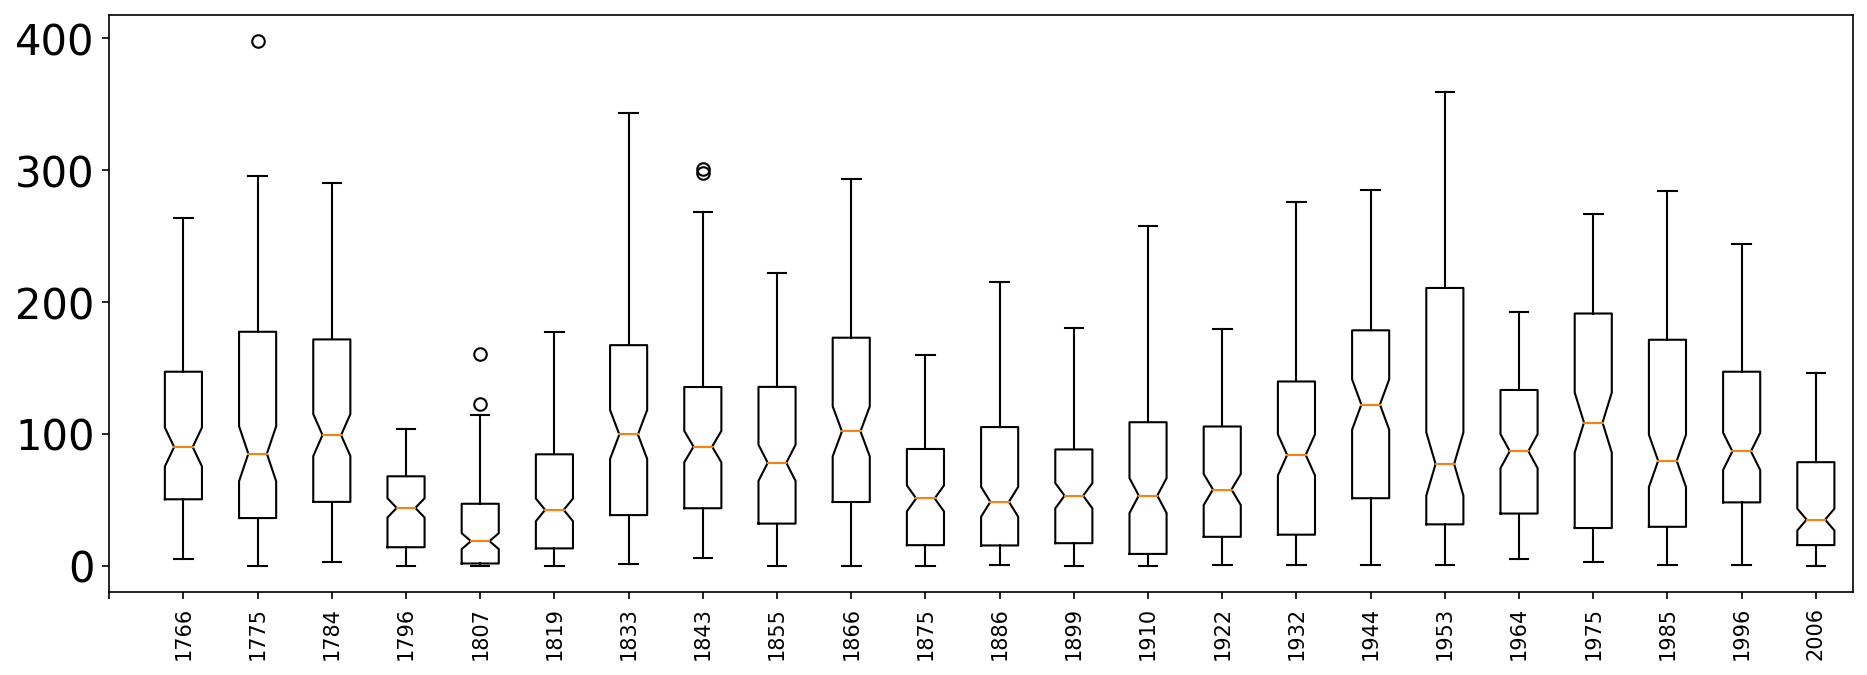

In [52]:
x_width, y_width = 15, 5
fig, ax = plt.subplots(1, 1, figsize=(x_width, y_width), dpi=150)

data = []
for key in periods.keys():
    data.append(list(periods[key]['ssn']))


plt.boxplot(data, 1)
years = [periods[key]['year'][0] for key in periods.keys()]
years.insert(0, '')
ticks = [i for i in range(len(years))]
plt.xticks(ticks, years, rotation='vertical', fontsize=10)